In [1]:
import numpy as np
import sys
import os

# add path to github folder with suite2p
sys.path.append("/github/suite2p/suite2p/")
import utils, register, chan2detect

dat = {}
dat['TX28'] = {}
dat['TX29'] = {}
dat['TX32'] = {}
dat['GAD3'] = {}
dat['GAD4'] = {}
dat['TX28'] = {'datexp': [], 'blk': []}
dat['TX29'] = {'datexp': [], 'blk': []}
dat['TX32'] = {'datexp': [], 'blk': []}
dat['GAD3'] = {'datexp': [], 'blk': []}
dat['GAD4'] = {'datexp': [], 'blk': []}

dat['TX28']['datexp'] = ['2018_10_31', '2018_11_01', '2018_11_02', '2018_11_14', '2018_12_17', '2018_12_18']
dat['TX29']['datexp'] = ['2018_11_06', '2018_11_07', '2018_11_08', '2018_11_09', '2018_11_12']
dat['TX32']['datexp'] = ['2018_11_08', '2018_11_09', '2018_11_12', '2018_11_13', '2018_11_14', '2018_12_18', '2018_12_19']
dat['GAD3']['datexp'] = ['2018_11_29', '2018_12_03', '2018_12_04', '2018_12_05', '2018_12_19', '2018_12_20']
dat['GAD4']['datexp'] = ['2018_12_03', '2018_12_04', '2018_12_05', '2018_12_18', '2018_12_19', '2018_12_20']

dat['TX28']['blk'] = ['1', '1', '2', '1', '1', '1']
dat['TX29']['blk'] = ['2', '1', '1', '2', '1']
dat['TX32']['blk'] = ['1', '1', '1', '1', '1', '1', '1']
dat['GAD3']['blk'] = ['2', '1', '2', '1', '1', '1']
dat['GAD3']['redblk'] = ['1', '3', '3', '3', '2', '2']
dat['GAD4']['blk'] = ['1', '1', '1', '1', '1', '2']
dat['GAD4']['redblk'] = ['3', '2', '2', '2', '2', '3']


/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import register

mice = ['GAD3', 'GAD4']
datelist = [[5], [5]]


for m,mouse in enumerate(mice):
    dates = dat[mouse]['datexp']
    print(datelist[m])
    for k in datelist[m]:
        date = dat[mouse]['datexp'][k]
        blk  = int(dat[mouse]['blk'][k])
        redblk  = int(dat[mouse]['redblk'][k])
                
        # green experiment save_path0
        froot = "/home/carsen/dm11/data/PROC/%s/%s/%d/"%(mouse, date, blk)
        print(froot)
        ops1 = np.load(os.path.join(froot, "suite2p/ops1.npy"))
        
        # 2-channel experiment raw data saved here
        data_path = [ "/home/carsen/nas/EXP/%s/%s/%d/"%(mouse, date, redblk) ]
        print(data_path[0])
        ops = ops1[0].copy()
        ops['fast_disk'] = []
        ops['save_path0'] = "/media/carsen/SSD/BIN/" # save binary locally on SSD
        ops['data_path'] = data_path
        ops['nchannels'] = 2
        ops['functional_chan'] = 1
        ops['keep_movie_raw'] = True
        
        # compute binaries for 2 channels       
        ops2 = utils.tiff_to_binary(ops)
        
        for iplane in range(0,len(ops1)):
            #ops2 = np.load("/media/carsen/SSD/BIN/suite2p/plane%d/ops.npy"%iplane).item()
            #opsOut = register.register_binary(ops2, ops1[iplane]['refImg'])
            
            opsOut = register.register_binary(ops2[iplane], ops1[iplane]['refImg'])
            ops1[iplane]['meanImg_chan2'] = opsOut['meanImg_chan2']
            stat = np.load(os.path.join(froot, "suite2p/plane%d/stat.npy"%iplane))
            ops1[iplane]['chan2_thres'] = 0.65
            ops1[iplane],redcell = chan2detect.detect(ops1[iplane],stat)
            np.save(os.path.join(froot, "suite2p/plane%d/ops.npy"%iplane), ops1[iplane])
            np.save(os.path.join(froot, "suite2p/plane%d/redcell.npy"%iplane), redcell)
            ops1[iplane]['save_path'] = os.path.join(froot, "suite2p/plane%d"%iplane)
            ops1[iplane]['save_path0'] = os.path.join(froot)
        utils.combined(ops1)
        
        

[5]
/home/carsen/dm11/data/PROC/GAD3/2018_12_20/1/
/home/carsen/nas/EXP/GAD3/2018_12_20/2/
Found 31 tifs
2776
/media/carsen/SSD/BIN/suite2p/plane0/data_raw.bin
using reference frame given
will not compute registration metrics
registered second channel in time 65.78
/media/carsen/SSD/BIN/suite2p/plane1/data_raw.bin
using reference frame given
will not compute registration metrics
registered second channel in time 65.41
/media/carsen/SSD/BIN/suite2p/plane2/data_raw.bin
using reference frame given
will not compute registration metrics
registered second channel in time 65.64
/media/carsen/SSD/BIN/suite2p/plane3/data_raw.bin
using reference frame given
will not compute registration metrics
registered second channel in time 64.58
/media/carsen/SSD/BIN/suite2p/plane4/data_raw.bin
using reference frame given
will not compute registration metrics
registered second channel in time 64.66
/media/carsen/SSD/BIN/suite2p/plane5/data_raw.bin
using reference frame given
will not compute registration me

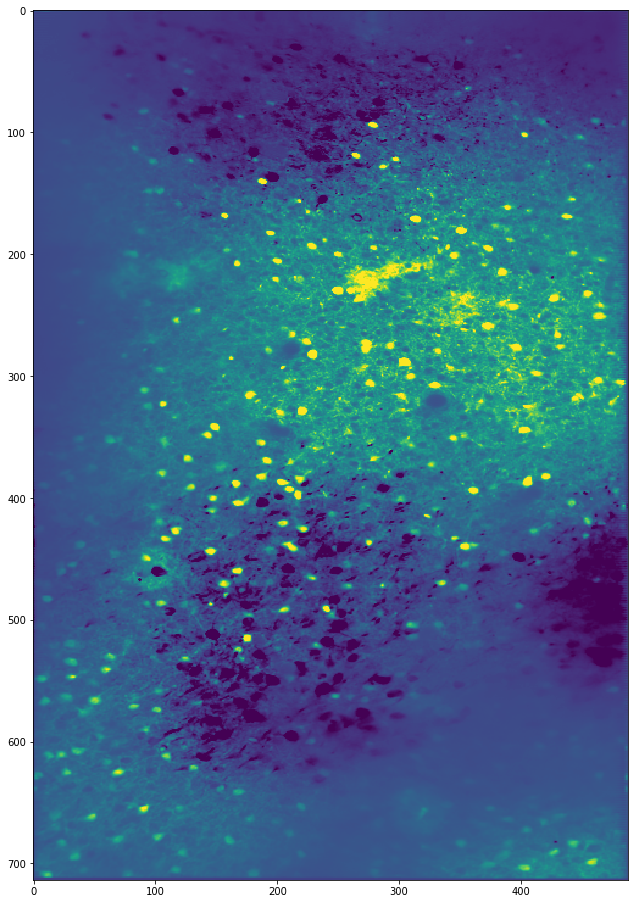

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(opsOut['meanImg_chan2'], vmin=-100, vmax=400)